In [ ]:
#import necessary libraries
import pandas as pd
from Bio.Seq import Seq
from Bio import SeqIO

#open the GenBank file
handle = open("JCV GenBank.gb")
records = list(SeqIO.parse(handle, "genbank"))

#create an empty list to store the data
data = []

#extract the data from the GenBank file
for record in records:
    for feature in record.features:
        if feature.type == "CDS":
            protein_seq = feature.qualifiers.get("translation", "N/A")[0]
            gene_name = feature.qualifiers.get("product","N/A")[0]
            #append the data to the list
            data.append([record.id, gene_name, protein_seq])

#create a pandas DataFrame from the list
df = pd.DataFrame(data, columns=["Virus Strain Name", "Gene Name", "Protein Sequence"])

#export the DataFrame to an excel file
df.to_excel("JCV strains_protein sequences.xlsx", index = False)

In [ ]:
import pandas as pd
import re
 
# Read both Excel files into dataframes
epitope_df = pd.read_excel('JCV scored epitopes.xlsx')
strain_df = pd.read_excel('JCV strains_protein sequences.xlsx')
 
# Initialize a new dataframe to store the results
results_df = pd.DataFrame(columns=['Epitope', 'Gene', 'Strain'])
 
# Iterate over the protein sequences in the second file
for _, row in strain_df.iterrows():
    protein_sequence = row['Protein sequence']
    gene = row['Gene name']
    strain = row['Virus strain name']
 
    # Iterate over the epitopes in the first file
    for _, epitope in epitope_df.iterrows():
        epitope_name = epitope['Epitopes']
 
        # Use a regular expression to search for the epitope in the protein sequence
        if re.search(epitope_name, protein_sequence):
            results_df = results_df.append({'Epitope': epitope_name, 'Gene': gene, 'Strain': strain}, ignore_index=True)
 
# Export the results to a new Excel file
results_df.to_excel('results_JCV scored epitopes.xlsx', index=False)

In [1]:
import pandas as pd
import seaborn as sns

# Read the data into a dataframe
results_df = pd.read_excel('results_JCV scored epitopes.xlsx')

# Create a pivot table using the 'Epitope' and 'Strain' columns as the rows and columns of the table, and the count of the 'Epitope' column as the values of the table.
pivot_table = pd.pivot_table(results_df, 
                             index='Epitope', 
                             columns='Strain', 
                             values='Epitope', 
                             aggfunc=len,
                             fill_value=0)

# Print the pivot table
print(pivot_table)

# Use the to_excel method to save the pivot table to an excel sheet
pivot_table.to_excel('pivot_table_JCV scored epitopes.xlsx', index=True)

Strain       #1  #10  #11  #12  #13.1  #13.2  #14  #15.1  #15.2  #16  ...  \
Epitope                                                               ...   
ARIPLPNL      1    1    1    1      1      1    1      1      1    1  ...   
AVDTVAAKQ     1    1    1    1      1      1    1      1      1    1  ...   
CLLPQMDTV     1    1    1    1      1      1    1      1      1    1  ...   
FFSVGGEALEL   1    1    1    1      1      1    1      1      1    1  ...   
FLKCIVLNI     1    1    1    1      1      1    1      1      1    1  ...   
FPPNSDTLY     1    1    1    1      1      1    1      1      1    1  ...   
ILMWEAVTL     1    1    1    1      1      1    1      1      1    1  ...   
IPVMRKAYL     2    2    2    2      2      2    2      2      2    2  ...   
LLIRGGVEV     1    1    1    1      1      1    1      1      1    1  ...   
LLLIWFRPV     1    1    1    1      1      1    1      1      1    1  ...   
LLMGMYLDF     1    1    1    1      1      1    1      1      1    1  ...   

In [1]:
import pandas as pd
import numpy as np
from pandas import ExcelWriter
from pandas import ExcelFile


df = pd.read_excel('% conservation of epitopes_scored.xlsx')

df['percentage'] = df.apply(lambda x: x.count()/len(df), axis=1)

#print(df)

print(df['percentage'])

0     14.1
1     14.1
2     14.1
3     14.1
4     14.1
5     14.1
6     14.1
7     14.1
8     14.1
9     14.1
10    14.1
11    14.1
12    14.1
13    14.1
14    14.1
15    14.1
16    14.1
17    14.1
18    14.1
19    14.1
Name: percentage, dtype: float64


In [2]:
print(df['Percentage'])

0     99.641577
1     98.924731
2     98.924731
3     99.283154
4     99.283154
5     99.283154
6     99.641577
7     97.132616
8     99.641577
9     98.207885
10    99.283154
11    97.849462
12    15.053763
13    98.566308
14    98.207885
15    97.849462
16    98.924731
17    99.283154
18    99.641577
19    98.924731
Name: Percentage, dtype: float64


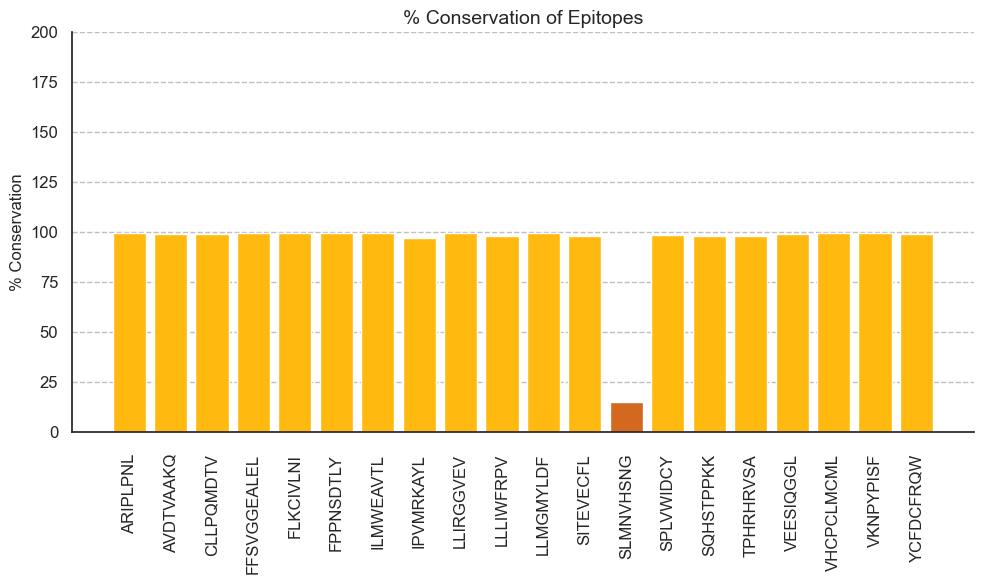

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Set the figure size and font size
plt.figure(figsize=(10, 6))
fontsize = 12

# Plot the data using seaborn
for i in range(len(df['Percentage'])):
    if df['Percentage'][i] <= 50:
        plt.bar(i, df['Percentage'][i], color='Chocolate')
    elif df['Percentage'][i] > 50 and df['Percentage'][i] <= 90:
        plt.bar(i, df['Percentage'][i], color='Orange')
    else:
        plt.bar(i, df['Percentage'][i], color='#FFB90F')

# Add vertical lines between bars
plt.grid(axis='y', linestyle='--', color='gray', alpha=0.5)

# Set the x-tick labels to the epitope names
plt.xticks(range(len(df['Epitope'])), df['Epitope'], fontsize=fontsize, rotation=90)

# Set the padding between the x-axis labels and the tick marks
plt.tick_params(axis='x', which='major', pad=10)

# Remove the x-axis label
plt.xlabel('')

# Set the y-axis label and font size
plt.ylabel('% Conservation', fontsize=fontsize)

# Set the title and font size
plt.title("% Conservation of Epitopes", fontsize=fontsize+2)

# Remove the top and right spines
sns.despine(top=True, right=True)

# Set the y-axis limits
plt.ylim(0, 200)

# Set the tick label font size
plt.yticks(fontsize=fontsize)

# Save the figure as an image
plt.savefig('conservation.png', dpi=300, bbox_inches='tight')

plt.tight_layout()

# Show the plot
plt.show()